## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [68]:
import pandas as pd


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [69]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [70]:
head = df.head()
tail = df.tail()

print(head)
print(tail)

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                     DATE     TAG  POSTS
2854  2025-09-01 00:00:00     php    120
2855  2025-09-01 00:00:00  python    762
2856  2025-09-01 00:00:00       r    162
2857  2025-09-01 00:00:00    ruby     14
2858  2025-09-01 00:00:00   swift    128


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [71]:
shape = df.shape
print(shape)

(2859, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [72]:
count_dates = df['DATE'].count()
count_tag = df['TAG'].count()
count_posts = df['POSTS'].count()

print(count_dates)
print(count_tag)
print(count_posts)


2859
2859
2859


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [73]:
lang = df.groupby('TAG').sum().sort_values('POSTS', ascending=False)
lang['POSTS']


TAG
javascript    2577133
python        2261776
java          1959212
c#            1649900
php           1500357
c++            826336
r              520560
c              413161
swift          343225
ruby           231333
go              75554
perl            70073
delphi          53019
assembly        45831
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [74]:
df.groupby('TAG').count().sort_values('DATE', ascending=False)

,DATE,POSTS
TAG,,
c#,207,207
assembly,206,206
c,206,206
c++,206,206
delphi,206,206
java,206,206
javascript,206,206
perl,206,206
php,206,206


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [75]:
df.DATE[1]

'2008-08-01 00:00:00'

In [76]:
type(df.DATE[1])

str

In [77]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


# Data Manipulation: Pivoting DataFrames

The .pivot() method

Sometimes you want to convert your DataFrame so that each category has its own column. For example, suppose you needed to take the table below and create a separate column for each actor, where each row is the Age of the actor:

How would you do this with the DataFrame below? 

    test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                            'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                            'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
    test_df

The easiest way to accomplish this is by using the .pivot() method in Pandas. Try the example for yourself. The thing to understand is how to supply the correct aguments to get the desired outcome. The index are the categories for the rows. The columns are the categories for the columns. And the values are what you want in the new cells. 

    pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
    pivoted_df

However, there's one very important thing to notice. What happens if a value is missing? In the example above there's no value for old Sylvester. In this case, the .pivot() method will insert a NaN value.

## Mini-Challenge

    Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

    Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

    Examine the head and the tail of the DataFrame. What does it look like?

    Print out the column names.

    Count the number of entries per column. 

You should get something like this:

## Solution

Here's how you pivot our existing DataFrame to get the outcome above:

    reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

We have 145 rows and 14 columns in the new DataFrame. Each programming language became a column and our date column became the new index (i.e., the label for the rows).

When we count the number of entries per column we see that not all languages are the same. The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month (e.g., Swift in July, 2008).

Dealing with NaN Values

In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.

    reshaped_df.fillna(0, inplace=True) 

The inplace argument means that we are updating reshaped_df. Without this argument we would have to write something like this:

    reshaped_df = reshaped_df.fillna(0) 

Let's check if we successfully replaced all the NaN values in our DataFrame.

We can also check if there are any NaN values left in the entire DataFrame with this line:

    reshaped_df.isna().values.any()

Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

Now we're all set to create some charts and visualise our data. For all of that and more, I'll see you in the next lesson!

## Data Manipulation



In [78]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,34.0,205.0,537.0,450.0,35.0,53.0,601.0,626.0,16.0,240.0,1400.0,288.0,28.0,192.0
2025-06-01,38.0,176.0,455.0,408.0,33.0,49.0,422.0,480.0,15.0,170.0,1056.0,257.0,27.0,143.0
2025-07-01,35.0,148.0,418.0,351.0,28.0,17.0,388.0,445.0,15.0,108.0,978.0,212.0,13.0,155.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [79]:
# How many rows and columns does it have? 
reshaped_df.shape


(207, 14)

In [80]:
# Print out the column names and print out the first 5 rows of the dataframe.
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [81]:
# Count the number of entries per column. 
reshaped_df.count()

TAG
assembly      206
c             206
c#            207
c++           206
delphi        206
go            191
java          206
javascript    206
perl          206
php           206
python        206
r             204
ruby          206
swift         197
dtype: int64

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [82]:
# Dealing with NaN Values

# In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.

reshaped_df.fillna(0, inplace=True) 

In [83]:
# We can also check if there are any NaN values left in the entire DataFrame with this line:

reshaped_df.isna().values.any()

# Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True. 

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [84]:
import matplotlib.pyplot as plt

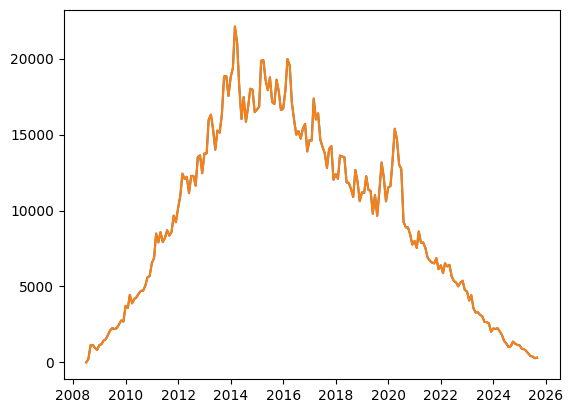

In [85]:
# same same

plt.plot(reshaped_df.index, reshaped_df['java'])

plt.plot(reshaped_df.index, reshaped_df.java)

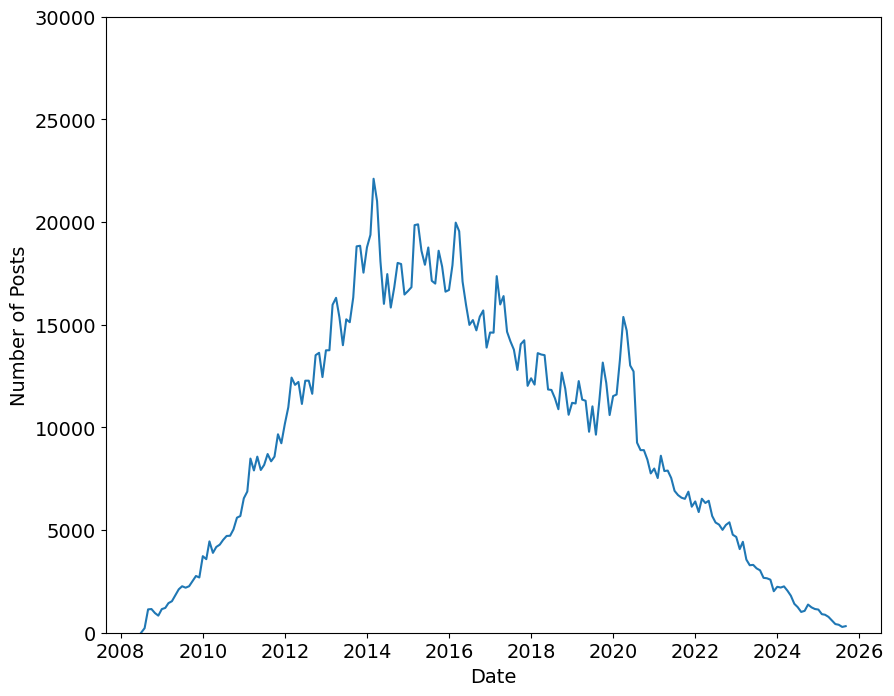

In [86]:
# Styling the Chart
# Let's look at a couple of methods that will help us style our chart:
# .figure() - allows us to resize our chart
# .xticks() - configures our x-axis
# .yticks() - configures our y-axis
# .xlabel() - add text to the x-axis
# .ylabel() - add text to the y-axis
# .ylim() - allows us to set a lower and upper bound 

plt.figure(figsize=(10, 8))
plt.xticks(fontsize=(14))
plt.yticks(fontsize=(14))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshaped_df.index, reshaped_df['java'])


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

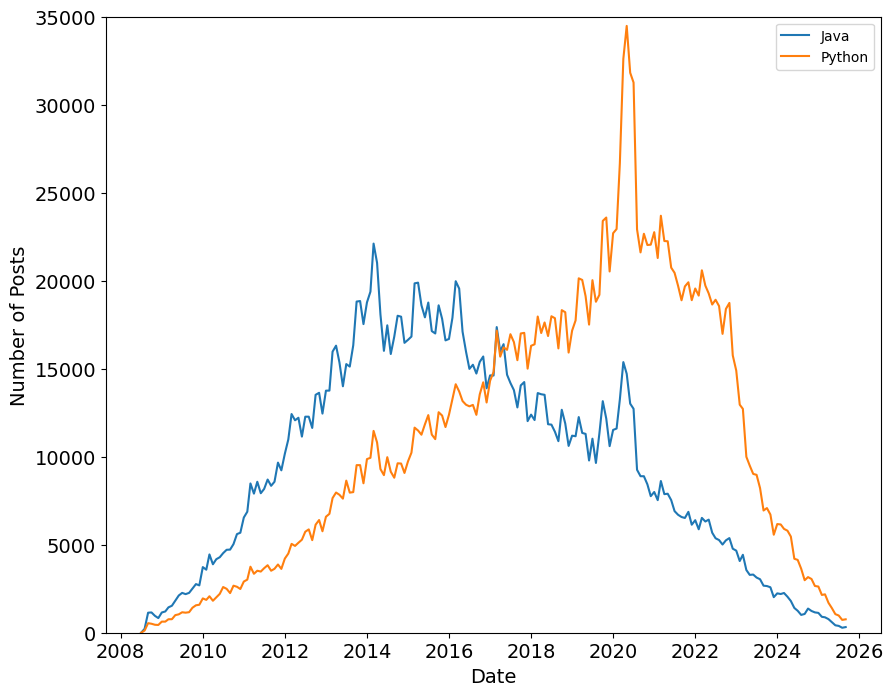

In [87]:
# Can you figure out how to plot both Java and Python next to each other?

plt.figure(figsize=(10, 8))
plt.xticks(fontsize=(14))
plt.yticks(fontsize=(14))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python')

plt.legend(fontsize=14, loc='upper left')
plt.legend()

plt.show()

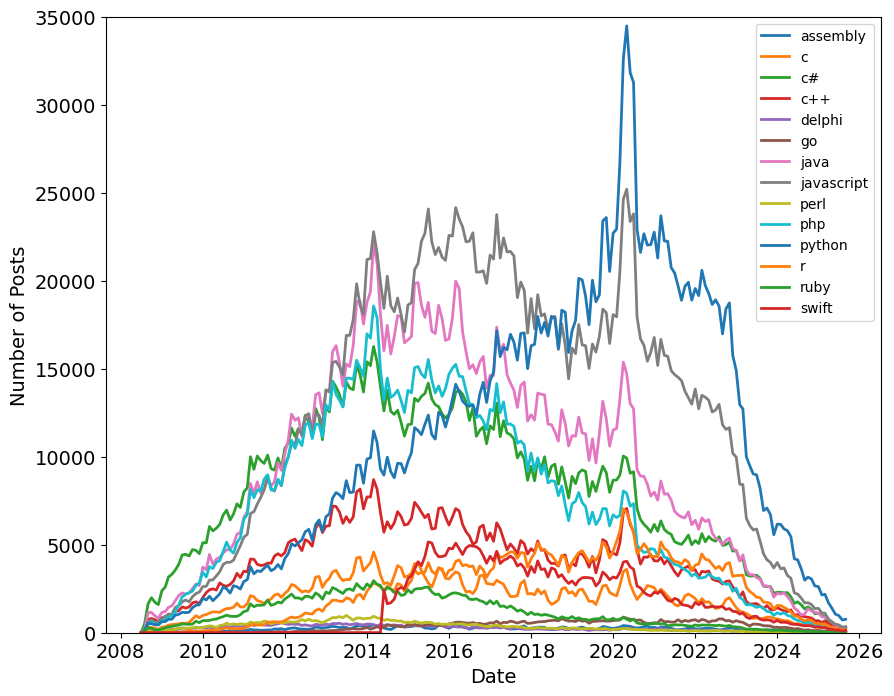

In [88]:
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=(14))
plt.yticks(fontsize=(14))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=2, label=reshaped_df[column].name)

plt.legend(fontsize=14, loc='upper left')
plt.legend()

plt.show()


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

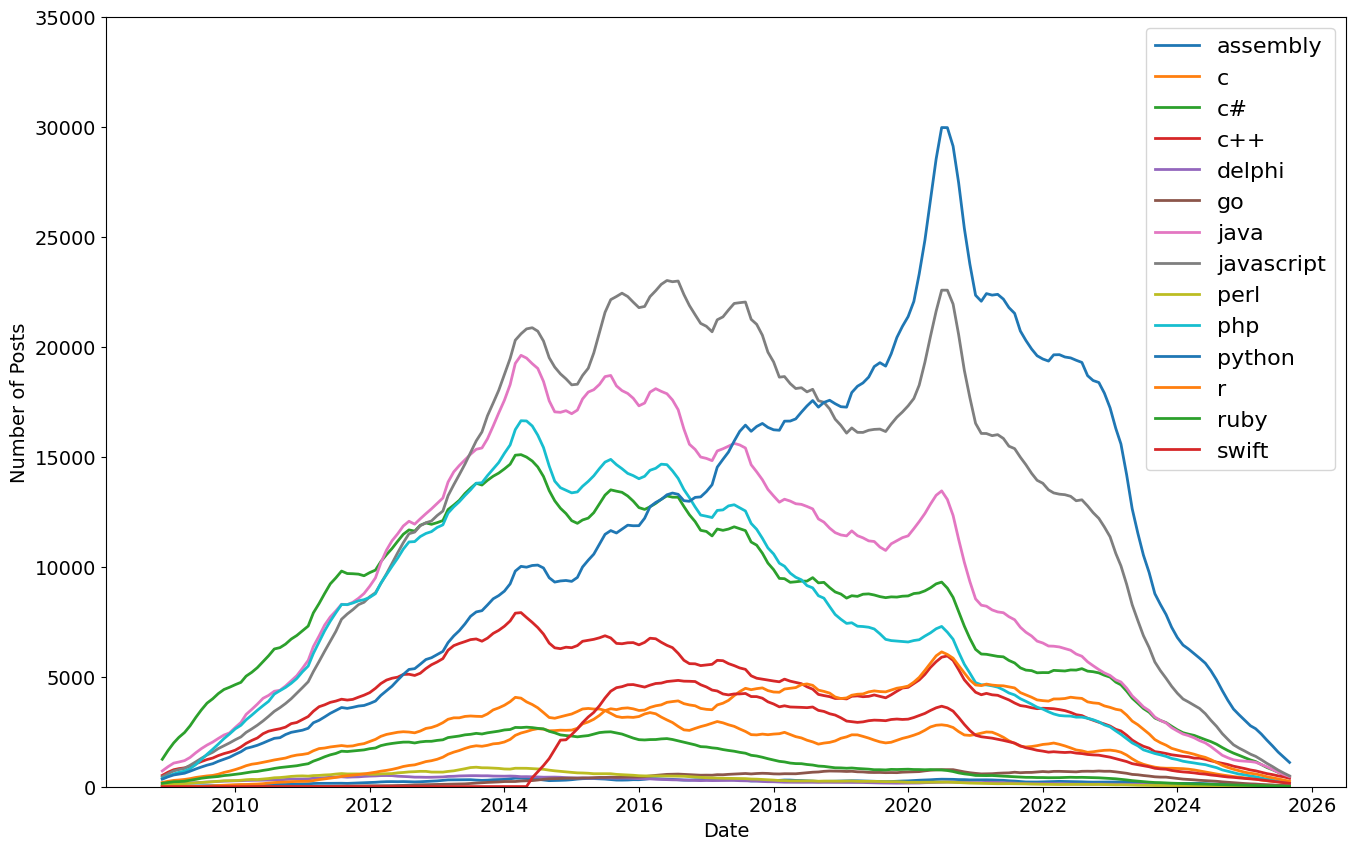

In [93]:
# Smoothing out Time-Series Data

# Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

# A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

# Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean(). We can chain these two methods up to create a DataFrame made up of the averaged observations.


roll_df = reshaped_df.rolling(window=6).mean()
    
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
    
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
                linewidth=2, label=roll_df[column].name)
    
plt.legend(fontsize=16)

In [ ]:
Learning Points & Summary

# Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

#     used .groupby() to explore the number of posts and entries per programming language

#     converted strings to Datetime objects with to_datetime() for easier plotting

#     reshaped our DataFrame by converting categories to columns using .pivot()

#     used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

#     created (multiple) line charts using .plot() with a for-loop

#     styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

#     added a legend to tell apart which line is which by colour

#     smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.